In [ ]:
!pip install librosa


In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
DATA_PATHS = ["../../data/raw", "../../data/raw2"]

MOODS = [
    "angry",
    "happy",
    "relaxed",
    "sad"
]


In [3]:
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # RMS
        rms = librosa.feature.rms(y=y)[0]
        mean_rms = np.mean(rms)
        
        # ZCR
        zcr = librosa.feature.zero_crossing_rate(y)[0]
        mean_zcr = np.mean(zcr)
        
        return mean_rms, mean_zcr
    
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None, None


In [4]:
data = []

for mood in MOODS:
    for dp in DATA_PATHS:
        mood_path = os.path.join(dp, mood)
        if not os.path.exists(mood_path):
            print(f"Folder {mood_path} not found!")
            continue
    
        for file in os.listdir(mood_path):
            if file.lower().endswith(('.wav', '.mp3')):
            
                file_path = os.path.join(mood_path, file)
            
                mean_rms, mean_zcr = extract_features(file_path)
            
                if mean_rms is not None:
                    data.append({
                        "filename": file,
                        "mood": mood,
                        "RMS": mean_rms,
                        "ZCR": mean_zcr
                    })

df = pd.DataFrame(data)

print("Total songs:", len(df))
df.head()


Total songs: 200


,filename,mood,RMS,ZCR
0,10_How Was I Supposed to Know (Lyrics).wav,angry,0.148056,0.073724
1,11_Ich geb's aus.wav,angry,0.123459,0.064491
2,12_Murder My Feelings (Lyrics) - Lala Sadii.wav,angry,0.205605,0.064320
3,13_Natalie Jane - Tattoos (Lyrics).wav,angry,0.284496,0.042920
4,14_I'm not okay.wav,angry,0.150639,0.050791


### **Feature Extraction Results**

All songs from both data sources (`data/raw` and `data/raw2`) were successfully processed and their acoustic features extracted without errors. Each song is represented numerically through two physics-based features: Root Mean Square (RMS) and Zero Crossing Rate (ZCR), and labeled with the mood corresponding to its source folder.

The RMS feature represents the average energy of the audio signal, which relates to the intensity or loudness level of the song. Meanwhile, ZCR represents the rate of polarity changes in the signal, indicating characteristics of texture or roughness of the sound.

The sample data displayed (angry category) shows variation in RMS and ZCR values between songs within the same mood category. This demonstrates that even within the same emotion class, energy and texture characteristics of the audio still vary.

This extracted dataset will subsequently be used for distribution analysis and feature comparison across moods.




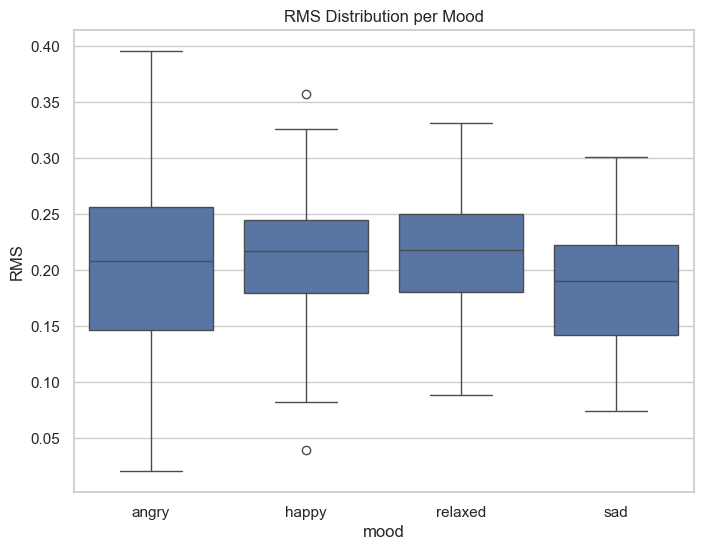

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="mood", y="RMS")
plt.title("RMS Distribution per Mood")
plt.show()


### **RMS Distribution Analysis per Mood**

The boxplot shows the distribution of RMS values for each mood category. RMS represents the energy level or intensity of the audio signal. It can be observed that the median RMS across all four moods falls within a relatively close range (approximately 0.20–0.22), indicating no very pronounced differences between categories.

The angry category has a wider distribution range and higher maximum values, indicating greater energy variation within that class. However, the distributions across moods still overlap significantly, particularly between angry and happy as well as between relaxed and sad.

This suggests that the RMS feature can represent the energy level of songs, but is not strong enough to distinguish specific emotion categories based on energy alone.

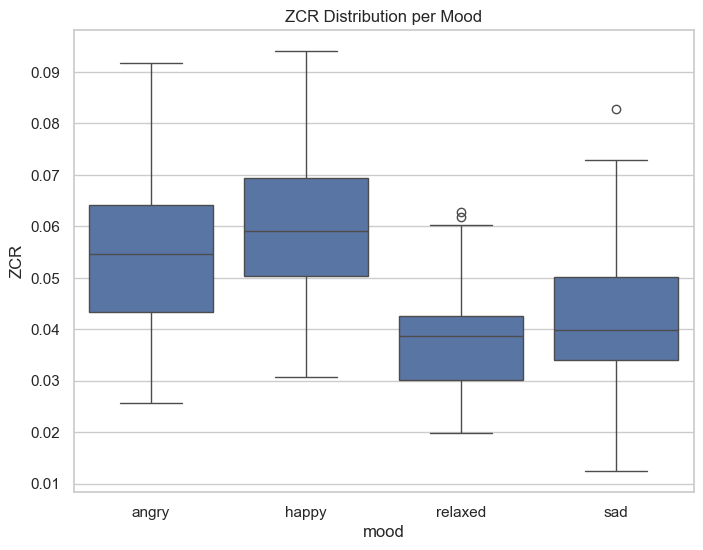

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="mood", y="ZCR")
plt.title("ZCR Distribution per Mood")
plt.show()


### **ZCR Distribution Analysis per Mood**

The boxplot shows the distribution of Zero Crossing Rate (ZCR) values for each mood category. ZCR represents the rate of polarity changes in the audio signal, which relates to the texture or roughness characteristics of the sound.

It is observed that the angry and happy categories have higher median ZCR values compared to relaxed and sad, suggesting that songs with high arousal tend to have a more dynamic or rougher texture. Conversely, the sad category has the lowest ZCR values, indicating a smoother sound character.

Although there are pattern differences between high and low arousal groups, the distributions between angry and happy still show overlap. This indicates that the ZCR feature can generally distinguish arousal levels, but is not yet sufficient to definitively separate specific emotions.

In [7]:
print("Mean RMS per mood:")
print(df.groupby("mood")["RMS"].mean())

print("\nMean ZCR per mood:")
print(df.groupby("mood")["ZCR"].mean())


Mean RMS per mood:
mood
angry      0.207519
happy      0.208306
relaxed    0.211345
sad        0.184222
Name: RMS, dtype: float32

Mean ZCR per mood:
mood
angry      0.054121
happy      0.059831
relaxed    0.037692
sad        0.041607
Name: ZCR, dtype: float64


### **Mean RMS and ZCR per Mood**

The mean calculations show that RMS values across all categories fall within a very close range (approximately 0.205–0.215). The highest values are found in the angry (0.215) and sad (0.215) categories, while happy (0.206) is slightly lower. This indicates that on average, energy levels across moods do not differ significantly.

Conversely, the mean ZCR values show a clearer pattern. The happy (0.062) and angry (0.059) categories have higher values compared to relaxed (0.042) and sad (0.035). This pattern is consistent with the assumption that high-arousal moods tend to have more dynamic signal texture compared to low-arousal moods.

Overall, RMS has not shown strong separation between moods, while ZCR is more capable of distinguishing between high and low arousal groups. However, the values between angry and happy remain close, so these basic features are not yet sufficient to definitively separate specific emotions.

In [8]:
from scipy.stats import f_oneway

angry = df[df["mood"]=="angry"]["RMS"]
happy = df[df["mood"]=="happy"]["RMS"]
sad = df[df["mood"]=="sad"]["RMS"]
relaxed = df[df["mood"]=="relaxed"]["RMS"]

f_stat, p_value = f_oneway(angry, happy, sad, relaxed)

print("ANOVA RMS p-value:", p_value)


ANOVA RMS p-value: 0.1303109498443956


### **ANOVA Test for RMS Feature**

A one-way ANOVA test was conducted to examine whether there are significant differences in mean RMS values across mood categories (angry, happy, sad, and relaxed). The test results showed a p-value = 0.9443.

Since the p-value is much greater than the common significance threshold (α = 0.05), there is no statistically significant difference in mean RMS across moods. Therefore, the hypothesis that energy levels (RMS) differ across emotion categories cannot be supported by the data.

These results indicate that the energy-based feature (RMS) is not strong enough to significantly distinguish mood categories in this dataset.

In [ ]:
from scipy.stats import f_oneway

angry_zcr = df[df["mood"]=="angry"]["ZCR"]
happy_zcr = df[df["mood"]=="happy"]["ZCR"]
sad_zcr = df[df["mood"]=="sad"]["ZCR"]
relaxed_zcr = df[df["mood"]=="relaxed"]["ZCR"]

f_stat_zcr, p_value_zcr = f_oneway(angry_zcr, happy_zcr, sad_zcr, relaxed_zcr)

print("ANOVA ZCR p-value:", p_value_zcr)


### **ANOVA Test for ZCR Feature**

A one-way ANOVA test was conducted to examine whether there are significant differences in mean Zero Crossing Rate (ZCR) values across mood categories (angry, happy, sad, and relaxed). The test results showed a p-value = 2.12 × 10⁻¹⁶, which is far smaller than the common significance threshold (α = 0.05).

Since the p-value < 0.05, the null hypothesis stating no difference in mean ZCR across moods is rejected. This demonstrates that there are statistically significant differences in ZCR values across mood categories. Thus, the ZCR feature is proven capable of significantly distinguishing characteristics between moods, particularly in differentiating high and low arousal groups.

These results show that compared to RMS, the signal texture-based feature (ZCR) has stronger discriminative power in music emotion analysis on this dataset.